## **Network Biology - Assignment 1**

In [259]:
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt
import networkx as nx
import re   

## Answer 1

In [260]:
# Number of nodes
num_nodes = 10

In [261]:
# Edges for unweighted graph type of network (20 edges)
edges = [
    [1, 2], [1, 3], [2, 4], [2, 5], [3, 6],
    [3, 7], [4, 8], [4, 9], [5, 10], [6, 10],
    [7, 8], [8, 9], [9, 10], [1, 4], [2, 6],
    [3, 9], [5, 7], [8, 10], [1, 5], [2, 7]
]

# Edges for weighted graph type of network (20 edges)
weighted_edges = [
    [1, 2, 6], [1, 3, 2], [2, 4, 2], [2, 5, 5], [3, 6, 3],
    [3, 7, 12], [4, 8, 25], [4, 9, 14], [5, 10, 23], [6, 10, 45],
    [7, 8, 12], [8, 9, 19], [9, 10, 30], [1, 4, 10], [2, 6, 2],
    [3, 9, 23], [5, 7, 22], [8, 10, 21], [1, 5, 65], [2, 7, 25]
]


#### 1. Adjacency Matrix

In [262]:
# Create empty adjacency matrices
ud_uw_adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
ud_w_adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
d_uw_adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
d_w_adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]

In [263]:
# Populate adjacency matrices
for src, dest in edges:
    ud_uw_adj_matrix[src - 1][dest - 1] = 1
    ud_uw_adj_matrix[dest - 1][src - 1] = 1

for src, dest, weight in weighted_edges:
    ud_w_adj_matrix[src - 1][dest - 1] = weight
    ud_w_adj_matrix[dest - 1][src - 1] = weight

for src, dest in edges:
    d_uw_adj_matrix[src - 1][dest - 1] = 1

for src, dest, weight in weighted_edges:
    d_w_adj_matrix[src - 1][dest - 1] = weight

In [264]:
# Print adjacency matrices and edge lists
print("Adjacency Matrix (Undirected Unweighted):")
for row in ud_uw_adj_matrix:
    print(row)

print("\nAdjacency Matrix (Undirected Weighted):")
for row in ud_w_adj_matrix:
    print(row)

print("\nAdjacency Matrix (Directed Unweighted):")
for row in d_uw_adj_matrix:
    print(row)

print("\nAdjacency Matrix (Directed Weighted):")
for row in d_w_adj_matrix:
    print(row)

Adjacency Matrix (Undirected Unweighted):
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0]

Adjacency Matrix (Undirected Weighted):
[0, 6, 2, 10, 65, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 5, 2, 25, 0, 0, 0]
[2, 0, 0, 0, 0, 3, 12, 0, 23, 0]
[10, 2, 0, 0, 0, 0, 0, 25, 14, 0]
[65, 5, 0, 0, 0, 0, 22, 0, 0, 23]
[0, 2, 3, 0, 0, 0, 0, 0, 0, 45]
[0, 25, 12, 0, 22, 0, 0, 12, 0, 0]
[0, 0, 0, 25, 0, 0, 12, 0, 19, 21]
[0, 0, 23, 14, 0, 0, 0, 19, 0, 30]
[0, 0, 0, 0, 23, 45, 0, 21, 30, 0]

Adjacency Matrix (Directed Unweighted):
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0

#### 2. Adjacency List

In [265]:
# Create edge lists
ud_uw_edge_list = [[] for _ in range(10)]
ud_w_edge_list = [[] for _ in range(10)]
d_uw_edge_list = [[] for _ in range(10)]
d_w_edge_list = [[] for _ in range(10)]

In [266]:
# Populate adjacency lists
for src, dest in edges:
    ud_uw_edge_list[src - 1].append(dest - 1)
    ud_uw_edge_list[dest - 1].append(src - 1)

for src, dest, weight in weighted_edges:
    ud_w_edge_list[src - 1].append([dest - 1, weight])
    ud_w_edge_list[dest - 1].append([src - 1, weight])

for src, dest in edges:
    d_uw_edge_list[src - 1].append(dest - 1)

for src, dest, weight in weighted_edges:
    d_w_edge_list[src - 1].append([dest - 1, weight])

In [267]:
print("Edge List (Undirected Unweighted):")
print(ud_uw_edge_list)

print("\nEdge List (Undirected Weighted):")
print(ud_w_edge_list)

print("\nEdge List (Directed Unweighted):")
print(d_uw_edge_list)

print("\nEdge List (Directed Weighted):")
print(d_w_edge_list)

Edge List (Undirected Unweighted):
[[1, 2, 3, 4], [0, 3, 4, 5, 6], [0, 5, 6, 8], [1, 7, 8, 0], [1, 9, 6, 0], [2, 9, 1], [2, 7, 4, 1], [3, 6, 8, 9], [3, 7, 9, 2], [4, 5, 8, 7]]

Edge List (Undirected Weighted):
[[[1, 6], [2, 2], [3, 10], [4, 65]], [[0, 6], [3, 2], [4, 5], [5, 2], [6, 25]], [[0, 2], [5, 3], [6, 12], [8, 23]], [[1, 2], [7, 25], [8, 14], [0, 10]], [[1, 5], [9, 23], [6, 22], [0, 65]], [[2, 3], [9, 45], [1, 2]], [[2, 12], [7, 12], [4, 22], [1, 25]], [[3, 25], [6, 12], [8, 19], [9, 21]], [[3, 14], [7, 19], [9, 30], [2, 23]], [[4, 23], [5, 45], [8, 30], [7, 21]]]

Edge List (Directed Unweighted):
[[1, 2, 3, 4], [3, 4, 5, 6], [5, 6, 8], [7, 8], [9, 6], [9], [7], [8, 9], [9], []]

Edge List (Directed Weighted):
[[[1, 6], [2, 2], [3, 10], [4, 65]], [[3, 2], [4, 5], [5, 2], [6, 25]], [[5, 3], [6, 12], [8, 23]], [[7, 25], [8, 14]], [[9, 23], [6, 22]], [[9, 45]], [[7, 12]], [[8, 19], [9, 21]], [[9, 30]], []]


## Answer 2

### Function to calculate degree of an undirected graph

In [268]:
def degree_undirected(adj_list):
    ans = []
    for neighbours in adj_list:
        ans.append(len(neighbours))
    return ans

In [269]:
degree_undirected(ud_uw_edge_list)

[4, 5, 4, 4, 4, 3, 4, 4, 4, 4]

### Function to calculate outdegree of an directed graph

In [270]:
def outdegree_directed(adj_list):
    ans = []
    for neighbours in adj_list:
        ans.append(len(neighbours))
    return ans

In [271]:
outdegree_directed(d_uw_edge_list)

[4, 4, 3, 2, 2, 1, 1, 2, 1, 0]

### Function to calculate indegree of an directed graph

In [272]:
def indegree_directed(adj_list):
    ans = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for neighbours in adj_list:
        for i in neighbours:
            ans[i] += 1
    return ans

In [273]:
indegree_directed(d_uw_edge_list)

[0, 1, 1, 2, 2, 2, 3, 2, 3, 4]

## Answer 3

In [274]:
np_matrix = np.array(ud_uw_adj_matrix)
np_matrix = np.dot(ud_uw_adj_matrix, ud_uw_adj_matrix)
print("A matrix = \n")
print(np.array(ud_uw_adj_matrix))
print()
print("A^2 matrix = \n")
print(np_matrix)

A matrix = 

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 0 1 1 1 1 0 0 0]
 [1 0 0 0 0 1 1 0 1 0]
 [1 1 0 0 0 0 0 1 1 0]
 [1 1 0 0 0 0 1 0 0 1]
 [0 1 1 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 1 1]
 [0 0 1 1 0 0 0 1 0 1]
 [0 0 0 0 1 1 0 1 1 0]]

A^2 matrix = 

[[4 2 0 1 1 2 3 1 2 1]
 [2 5 3 1 2 0 1 2 1 2]
 [0 3 4 2 2 0 0 2 0 2]
 [1 1 2 4 2 1 2 1 1 2]
 [1 2 2 2 4 2 1 2 1 0]
 [2 0 0 1 2 3 2 1 2 0]
 [3 1 0 2 1 2 4 0 2 2]
 [1 2 2 1 2 1 0 4 2 1]
 [2 1 0 1 1 2 2 2 4 1]
 [1 2 2 2 0 0 2 1 1 4]]


When we square the adjacency matrix of a graph, we get the number of paths of length of exactly 2, between those vertices.
For example, if we see the above A^2 matrix, the value 3 in the 2nd row and 3rd column of that matrix signifies a total number of 3 paths of length 2, between node 1 and node 2 (assuming 0-based indexing)

Also, if we raise the nth power of adjacency matrix, we get the number of n-length paths between two vertices.

## Answer 4

### a) Degree of each node

In [275]:
# Reading the GML file
with open("dataset/football.gml", "r") as file:
    gml_content = file.read()

# Creating a graph from the GML content
G = nx.parse_gml(gml_content)

# Creating one-hot encodings for nodes and storing in a map
node_list = sorted(G.nodes)
node_to_int = dict()
int_to_node = dict()
edge_list = list(G.edges)
for i in range(0, len(node_list)):
    node_to_int[node_list[i]] = i
    int_to_node[i] = node_list[i]
    
graph = [[] for _ in range(len(node_list))]

for edges in G.edges:
    graph[node_to_int[edges[0]]].append(node_to_int[edges[1]])
    graph[node_to_int[edges[1]]].append(node_to_int[edges[0]])

degree = degree_undirected(graph)

for i in range(len(degree)):
    print(f"Node {int_to_node[i]} has a degree of {degree[i]}")


Node AirForce has a degree of 10
Node Akron has a degree of 11
Node Alabama has a degree of 11
Node AlabamaBirmingham has a degree of 10
Node Arizona has a degree of 11
Node ArizonaState has a degree of 11
Node Arkansas has a degree of 10
Node ArkansasState has a degree of 10
Node Army has a degree of 11
Node Auburn has a degree of 11
Node BallState has a degree of 10
Node Baylor has a degree of 10
Node BoiseState has a degree of 9
Node BostonCollege has a degree of 11
Node BowlingGreenState has a degree of 11
Node BrighamYoung has a degree of 12
Node Buffalo has a degree of 11
Node California has a degree of 11
Node CentralFlorida has a degree of 8
Node CentralMichigan has a degree of 11
Node Cincinnati has a degree of 11
Node Clemson has a degree of 10
Node Colorado has a degree of 11
Node ColoradoState has a degree of 10
Node Connecticut has a degree of 7
Node Duke has a degree of 11
Node EastCarolina has a degree of 11
Node EasternMichigan has a degree of 11
Node Florida has a degr

Number of nodes in the network: 115
Number of edges in the network: 613


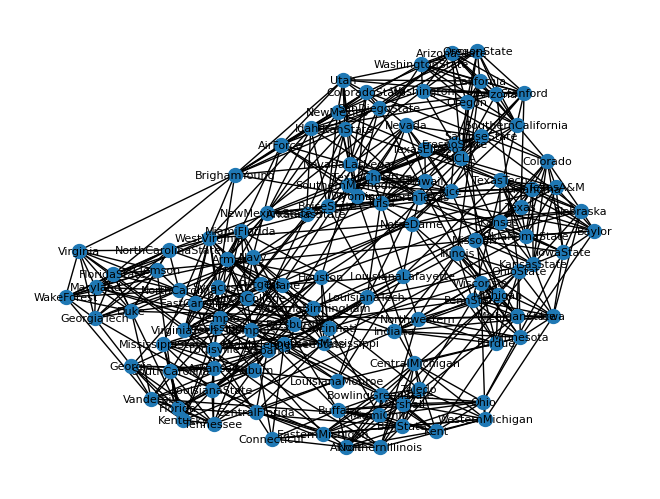

In [276]:
print(f"Number of nodes in the network: {len(node_list)}")
print(f"Number of edges in the network: {len(edge_list)}")
nx.draw(G, with_labels = True, node_size = 100, font_size = 8)
plt.show()

### b) Plotting the degree distribution

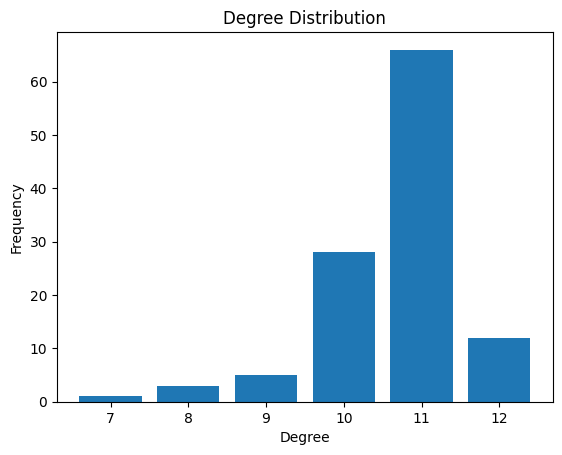

In [277]:
# Compute the degree distribution
degree_counts = {}
for i in degree:
    if i in degree_counts:
        degree_counts[i] += 1
    else:
        degree_counts[i] = 1

# Sort the degree counts by degree value
sorted_degree_counts = dict(sorted(degree_counts.items()))

# Plot the degree distribution
plt.bar(sorted_degree_counts.keys(), sorted_degree_counts.values())
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

## Answer 5

In [278]:
def generate_random_graph(n, e):
    if e > n * (n - 1) / 2:
        raise ValueError("Too many edges for the given number of nodes.")

    graph = {node: set() for node in range(n)}

    edge_count = 0
    while edge_count < e:
        node1 = random.randint(0, n - 1)
        node2 = random.randint(0, n - 1)

        if node1 != node2 and node2 not in graph[node1]:
            graph[node1].add(node2)
            graph[node2].add(node1)
            edge_count += 1

    return graph

def compute_degree_distribution(graph):
    degrees = [len(neighbors) for neighbors in graph.values()]
    degree_counts = {}

    for degree in degrees:
        if degree in degree_counts:
            degree_counts[degree] += 1
        else:
            degree_counts[degree] = 1

    return degree_counts

In [279]:
def plot_degree_distribution(degree_distribution):
    degrees, counts = zip(*degree_distribution.items())
    plt.bar(degrees, counts)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()

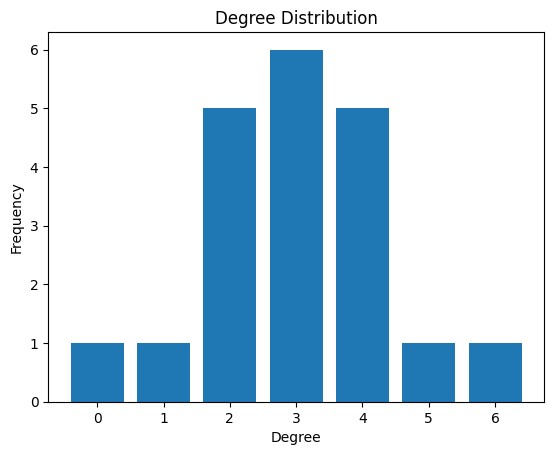

In [280]:
n = 20  # Number of nodes
e = 30  # Number of edges

random_graph = generate_random_graph(n, e)

degree_dist = compute_degree_distribution(random_graph)

plot_degree_distribution(degree_dist)

## Answer 6

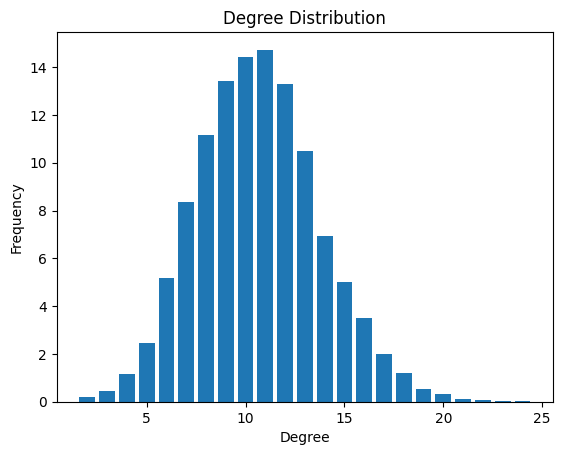

In [281]:
n = G.number_of_nodes()
e = G.number_of_edges()

total_degree = dict()

for i in range(100):
    random_graph = generate_random_graph(n, e)
    degree_dict = compute_degree_distribution(random_graph)
    total_degree = {k: total_degree.get(k, 0) + degree_dict.get(k, 0) for k in set(total_degree) | set(degree_dict)}

for key in total_degree:
    total_degree[key] /= 100
    
plot_degree_distribution(total_degree)


When compared to networks created at random, real-world networks frequently show distinguishing traits in their degree distributions. Here are some significant variations:

1. **Scale-Free vs. Poisson Distribution:**
Scale-free degree distribution is frequently seen in real-world networks, including social networks, the World Wide Web, and biological networks. This indicates that while most nodes have relatively modest degrees, a small number of nodes (hubs) have extremely high degrees. The degree distribution exhibits a power-law, in which the likelihood that a node has k connections decreases gradually as k increases.


2. **STP: Small-World Phenomenon:**
The small-world phenomenon, which is characterised by low average path lengths between nodes despite the network's huge size, is frequently seen in real-world networks. High clustering and short path lengths both contribute to this characteristic. In comparison to real-world networks, randomly produced networks typically have longer average path lengths and lower clustering coefficients.

3. **Hierarchical Structure:**
Networks in the real world frequently have hierarchical or modular structures. This indicates that nodes have a tendency to group together to create communities or modules, some of which may be related to one another.

## Answer 7

Check folder Q7 for the images

## Answer 8

In [282]:
def local_clustering_coefficient(graph, node):
    # neighbors = list(graph[node])
    neighbors = []
    for i in range(len(graph[node])):
        if (graph[node][i] == 1):
            neighbors.append(i)
    k = len(neighbors)
    if k < 2:
        return 0.0

    num_connected_pairs = 0
    for i in range(k):
        for j in range(i + 1, k):
            if graph[neighbors[i]][neighbors[j]] == 1:
                num_connected_pairs += 1

    return 2.0 * num_connected_pairs / (k * (k - 1))


def average_clustering_coefficient(graph):
    if len(graph) < 3:
        return 0.0

    total_coefficient = sum(local_clustering_coefficient(graph, node) for node in range (len(graph)))
    return total_coefficient / len(graph)

# Computing and printing the average clustering coefficient
avg_clustering = average_clustering_coefficient(nx.adjacency_matrix(G).toarray())
print("Average Clustering Coefficient:", avg_clustering)

Average Clustering Coefficient: 0.40321601104209814


This answer can be verified using cytoscape. See folder Q7 to match with correct answer.

## Answer 9

In [284]:
def shortest_path(adj_matrix, start, target):
    n = len(adj_matrix)
    distances = [float('inf')] * n
    distances[start] = 0

    # Priority queue to store (distance, vertex) pairs
    heap = [(0, start)]

    while heap:
        current_distance, current_vertex = heapq.heappop(heap)

        # If current distance is greater than recorded distance, skip
        if current_distance > distances[current_vertex]:
            continue

        if current_vertex == target:
            return distances[target]

        for neighbor, weight in enumerate(adj_matrix[current_vertex]):
            if weight > 0:  # There's an edge
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(heap, (distance, neighbor))

    return float('inf')  # Target node not reachable

In [285]:
src = 0
dest = 9
ans = shortest_path(ud_w_adj_matrix, src, dest)

if ans != float('inf'):
    print(f"Shortest distance from node {src} to node {dest}: {ans}")
else:
    print(f"No path found from node {src} to node {dest}")

Shortest distance from node 0 to node 9: 34


## Answer 10

### Titin protein analysis
Details about the dataset can be found from https://string-db.org/cgi/network?taskId=brX7t3lzA3c0&sessionId=bxx1Rqgyt5A6

#### a) Number of nodes and edges in the graph

In [286]:
import csv

edge_list = []
data = 'dataset/titin.csv'  

with open(data, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)

    for row in csv_reader:
        node1 = row[0]
        node2 = row[1]
        edge_list.append([node1, node2])

nodes = set()
for i in edge_list:
    nodes.add(i[0])
    nodes.add(i[1])

nodes = sorted(list(nodes))
print(f"The number of nodes in the graph is: {len(nodes)}")
print(f"The number of edges in the graph is: {int(len(edge_list)/2)}")


The number of nodes in the graph is: 21
The number of edges in the graph is: 115


#### b) Plotting degree distribution on log log scale

In [287]:
node_to_int = dict()
int_to_node = dict()
for i in range(0, len(nodes)):
    node_to_int[nodes[i]] = i
    int_to_node[i] = nodes[i]
    
graph = [[] for _ in range(len(node_list))]

for edges in edge_list:
    graph[node_to_int[edges[0]]].append(node_to_int[edges[1]])
    graph[node_to_int[edges[1]]].append(node_to_int[edges[0]])

degree = degree_undirected(graph)

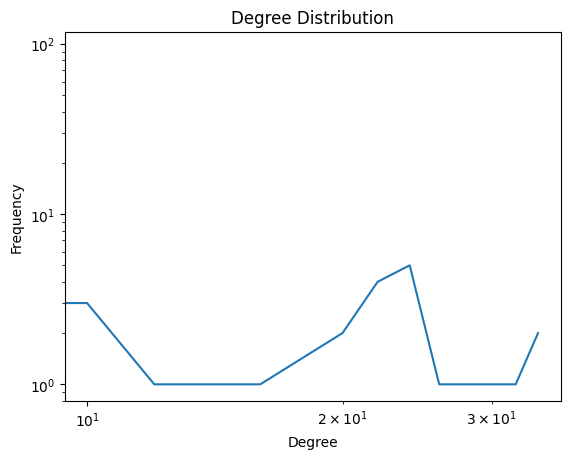

In [288]:
degree_counts = {}
for i in degree:
    if i in degree_counts:
        degree_counts[i] += 1
    else:
        degree_counts[i] = 1

sorted_degree_counts = dict(sorted(degree_counts.items()))

plt.loglog(sorted_degree_counts.keys(), sorted_degree_counts.values())
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()